# Similarity analysis

We want to determine if the different batch simulated data is able to capture the biological signal that is present in the original data:  How much of the real input data is captured in the simulated batch data?

In other words, we want to ask: “do these datasets have similar patterns”?

To do this we will use a [procrustes analysis](https://en.wikipedia.org/wiki/Procrustes_analysis).

**How does it work?**
Given data1 and data2, procrustes manipulates data1 to transform it into data2 through a series of rotations, shifts, scaling in order to minimize the sum of squares of the difference between the two points: $\Sigma(data1 - data2)^2$.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import ast
import pandas as pd
import numpy as np
import random
import glob
from plotnine import *
from scipy.spatial import procrustes
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Load config file
config_file = "config_exp_2.txt"

d = {}
float_params = ["learning_rate", "kappa", "epsilon_std"]
str_params = ["analysis_name", "NN_architecture"]
lst_params = ["num_batches"]
with open(config_file) as f:
    for line in f:
        (name, val) = line.split()
        if name in float_params:
            d[name] = float(val)
        elif name in str_params:
            d[name] = str(val)
        elif name in lst_params:
            d[name] = ast.literal_eval(val)
        else:
            d[name] = int(val)

In [3]:
# Parameters
analysis_name = d["analysis_name"]
NN_architecture = d["NN_architecture"]
num_batches = d["num_batches"]

In [4]:
# Load data
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../.."))

batch_dir = os.path.join(
    base_dir,
    "data",
    "batch_simulated",
    analysis_name)

In [5]:
%%time
# Calculate disparity using Procrustes analysis
output_list = []

for i in num_batches:
    print('Cacluating disparity of 1 batch vs {} batches..'.format(i))
    
    # Get batch 1 data
    batch_1_file = os.path.join(
        batch_dir,
        "Batch_1.txt.xz")

    batch_1 = pd.read_table(
        batch_1_file,
        header=0,
        index_col=0,
        sep='\t')

    # Simulated data with all samples in a single batch
    original_data_df =  batch_1
    
    # Get data with additional batch effects added
    batch_other_file = os.path.join(
        batch_dir,
        "Batch_"+str(i)+".txt.xz")

    batch_other = pd.read_table(
        batch_other_file,
        header=0,
        index_col=0,
        sep='\t')
    
    # Simulated data with i batch effects
    batch_data_df =  batch_other
    
    # Procrustes
    mtx1, mtx2, disparity = procrustes(original_data_df, batch_data_df)
    
    output_list.append(disparity)

Cacluating disparity of 1 batch vs 1 batches..
Cacluating disparity of 1 batch vs 2 batches..
Cacluating disparity of 1 batch vs 5 batches..
Cacluating disparity of 1 batch vs 10 batches..
Cacluating disparity of 1 batch vs 20 batches..
Cacluating disparity of 1 batch vs 50 batches..
Cacluating disparity of 1 batch vs 100 batches..
Cacluating disparity of 1 batch vs 500 batches..
Cacluating disparity of 1 batch vs 1000 batches..
Cacluating disparity of 1 batch vs 2000 batches..
Cacluating disparity of 1 batch vs 3000 batches..
Cacluating disparity of 1 batch vs 6000 batches..
CPU times: user 53min 44s, sys: 10min 41s, total: 1h 4min 26s
Wall time: 19min 3s


In [7]:
# Permute simulated data
simulated_data_file = os.path.join(
    base_dir,
    "data",
    "simulated",
    analysis_name,
    "simulated_data.txt.xz")

# Read in data
simulated_data = pd.read_table(
    simulated_data_file,
    header=0, 
    index_col=0,
    sep='\t')

simulated_data.head(10)

shuffled_simulated_arr = []
num_samples = simulated_data.shape[0]

for i in range(num_samples):
    row = list(simulated_data.values[i])
    shuffled_simulated_row = random.sample(row, len(row))
    shuffled_simulated_arr.append(shuffled_simulated_row)

shuffled_simulated_data = pd.DataFrame(shuffled_simulated_arr, 
                                       index=simulated_data.index, 
                                       columns=simulated_data.columns)
shuffled_simulated_data.head()

,5340,339,244,1567,1827,4981,2310,3929,1498,3226,...,2787,2526,3299,3097,5330,2854,494,5089,3662,1920
0,0.324114,0.419523,0.636254,0.300091,0.592244,0.297099,0.406197,0.179123,0.179886,0.441347,...,0.558043,0.323039,0.657627,0.219489,0.575979,0.503013,0.482530,0.185381,0.327854,0.408834
1,0.226285,0.366165,0.210840,0.080744,0.172689,0.508769,0.273256,0.498547,0.494821,0.664837,...,0.136232,0.564258,0.190276,0.269389,0.535711,0.321009,0.470564,0.523576,0.361082,0.317888
2,0.203689,0.328278,0.279444,0.433384,0.207008,0.235133,0.365852,0.422747,0.515260,0.164136,...,0.424161,0.098328,0.346837,0.341678,0.554523,0.390317,0.373612,0.295922,0.234165,0.578888
3,0.565282,0.424036,0.129249,0.727749,0.124668,0.547156,0.347499,0.327946,0.353447,0.450143,...,0.366555,0.281942,0.443382,0.249102,0.251687,0.554808,0.446381,0.576351,0.534426,0.437712
4,0.421600,0.279015,0.265494,0.295880,0.583905,0.211711,0.418221,0.442220,0.184913,0.315750,...,0.159926,0.372371,0.219617,0.213697,0.444228,0.657383,0.594396,0.606711,0.353428,0.494566


In [11]:
# Procrustes analysis of permuted dataset (Negative control)
mtx1, mtx2, permuted_disparity = procrustes(original_data_df, shuffled_simulated_data)

threshold = pd.DataFrame(
    pd.np.tile(
        permuted_disparity,
        (len(num_batches), 1)),
    index=num_batches,
    columns=['disparity'])

permuted_disparity

0.9721253236208722

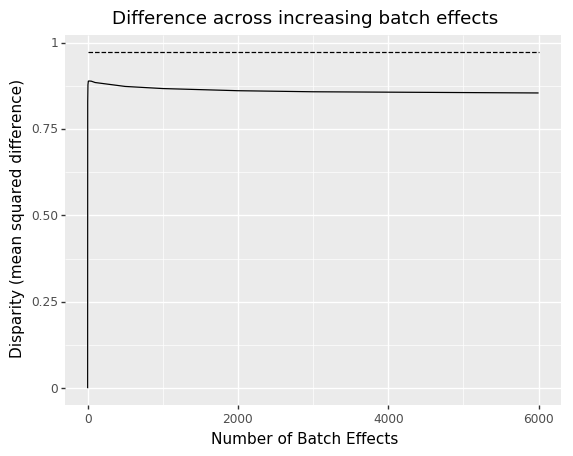

<ggplot: (8777099425579)>

In [9]:
# Plot
disparity_per_batch_effect = pd.DataFrame({'num_batch_effects':num_batches, 
                                     'disparity': output_list
                                    })

ggplot(disparity_per_batch_effect, aes(x='num_batch_effects', y='disparity')) \
    + geom_line() \
    + geom_line(aes(x=num_batches, y='disparity'), threshold, linetype='dashed') \
    + xlab('Number of Batch Effects') \
    + ylab('Disparity (mean squared difference)') \
    + ggtitle('Difference across increasing batch effects')

In [12]:
# Print disparity scores
disparity_per_batch_effect = pd.DataFrame(data={'disparity': output_list},
                                     index=num_batches)
disparity_per_batch_effect

,disparity
1,1.559086e-24
2,8.286648e-01
5,8.777576e-01
10,8.884513e-01
20,8.888770e-01
50,8.882983e-01
100,8.844528e-01
500,8.731110e-01
1000,8.669806e-01
2000,8.607515e-01
